In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy
import matplotlib.markers
from numpy import genfromtxt


In [2]:
# (a) load data

my_data = genfromtxt('q2-data/x.csv', delimiter=',')

print(my_data.shape)

(10000, 2)


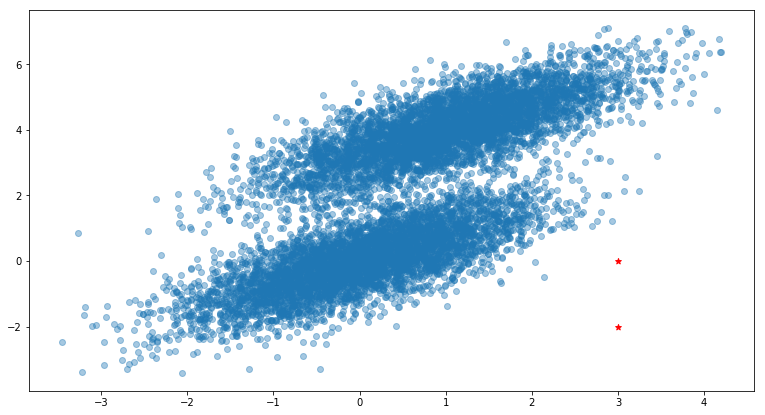

In [3]:
x1 = np.array([x[0] for x in my_data], dtype=float)
x2 = np.array([x[1] for x in my_data], dtype=float)
x = np.array([[x[0], x[1]] for x in my_data], dtype=float)

plt.figure(figsize=(13,7))
plt.scatter(x1[:], x2[:], alpha = .4)
plt.scatter([3, 3],[-2, 0],color='r',marker="*")
plt.show()



(b) Probability density function of Bivariate Gaussian Distribution

$$
p(x) = \frac{1}{2\pi\sqrt{||\Sigma ||}}e^{-\frac{1}{2} (x - \mu)^{T} @ \Sigma^{-1}@(x-\mu)}
$$

In [4]:
# (b) E-step functions

# This function computes the probability density of a given data point
# @param xi a given datapoint, in the form of a vector
# @param mean mean vector of the Bivariate Nomal Distribution
# @param covMat covarian matrix, of shape (2, 2)
# @return pXi the probability density of xi, likelihood
def pOfDataPoint(xi, mean, covMat):
    
    coeff = 1/ (2* np.pi * np.sqrt(np.linalg.det(covMat)))
    var = np.exp(-0.5 * ((xi - mean) @ np.linalg.inv(covMat) @ (xi - mean)))
    pXi = coeff * var
    
    return pXi


# This function computes the probability densities of given data, it should call pOfDataPoint
# @param x given data, of shape (n, 2), where n is the number of examples
# @param mean mean vector of the Bivariate Nomal Distribution
# @param covMat covarian matrix, of shape (2, 2)
# @return p the probability densities of all data points, likelihoods
def pOfData(x, mean, covMat):

    p = []
    for i in x:
        p.append(pOfDataPoint(i, mean, covMat))
        
    p = np.array(p)
    return p



# This function computes the posterior probabilities
# @param pLike1 likelihoods of all datapoints for class 1, i.e. p(x|c1)
# @param pLike2 likelihoods of all datapoints for class 2, i.e. p(x|c2)
# @param pC1 prior probability of class 1, scalar
# @param pC2 prior probability of class 2, scalar
# @return pPost1 posterior probabilities of all datapoints for class 1, i.e. p(c1|x), should be a vector
# @return pPost2 posterior probabilities of all datapoints for class 2, i.e. p(c2|x), should be a vector
def pPost(pLike1, pLike2, pC1, pC2):
    
    pPost1 = []
    pPost2 = []
    
    for i in range(0, pLike1.shape[0]):
        p1 = pLike1[i] * pC1 / (pLike1[i] * pC1 + pLike2[i] * pC2)
        p2 = 1 - p1
        
        pPost1.append(p1)
        pPost2.append(p2)
    
    pPost1 = np.array(pPost1)
    pPost1 = np.array(pPost1)
    
    return pPost1, pPost2




(c) Set initial values to the following parameters:

$$
p(c1) = p(c2) = 0.5
$$

$$
\mu_1 = \begin{bmatrix}
3\\-2 
\end{bmatrix}
$$

$$
\mu_2 = \begin{bmatrix}
3\\0 
\end{bmatrix}
$$

$$
\Sigma_1 = \Sigma_2 = \begin{bmatrix}
1 &0 \\0 
 &1 
\end{bmatrix}
$$

In [5]:
# (c) Initialization


pC1 = 0.5
pC2 = 0.5

mean_1 = np.array([3, -2])
mean_2 = np.array([3, 0])

covMat_1 = np.array([[1, 0], [0, 1]])
covMat_2 = np.array([[1, 0], [0, 1]])



In [6]:
# classification:

pLike_1 = pOfData(x, mean_1, covMat_1)
pLike_2 = pOfData(x, mean_2, covMat_2)

pPost_1, pPost_2 = pPost(pLike_1, pLike_2, pC1, pC2)

label = np.where(pPost_1 > pPost_2, 0, 1)


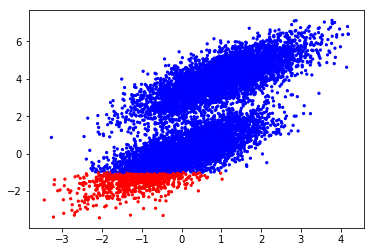

In [7]:
# PLOT:

plt.figure()

colors = []
for i in label:
    if i == 0:
        colors.append('red')
    else:
        colors.append('blue')

plt.scatter(x[:, 0], x[:, 1], c = colors, s = 5)
plt.show()

(d) Use the following formulas:

$$
p(c) = \frac{1}{n}\sum_{i = 1}^np(c|x_i)
$$

$$
\mu^T = \frac{p(c|x)^T @ x}{np(c)}
$$

$$
\Sigma = \frac{(D * p(c|x))^T @ D}{np(c)}
$$

$$
\mathrm{where} \,\,\, D = x - \mu^T
$$

In [8]:
# (d) M-step function
# hint: you need to make sure p(c|x) is 2-demensional when applying the covariance formula

# This function updates prior probability, mean, and covariance of a class
# @param pPost post probabilities of all data points, i.e. p(c|x), should be a vector
# @return pC updated prior probability, scalar
# @return mean updated mean, vector
# @return covMat covariance matrix, updated covariance, of shape (2, 2)
def update(pPost, x):
    
    pC = np.mean(pPost)
    mean = (np.matmul(pPost, x)) / (x.shape[0] * pC)
    D = x - mean
    covMat = (np.matmul((D * np.reshape(pPost, (len(pPost), 1))).T , D)) / (x.shape[0] * pC)
    
    return pC, mean, covMat



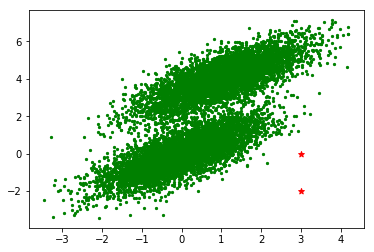

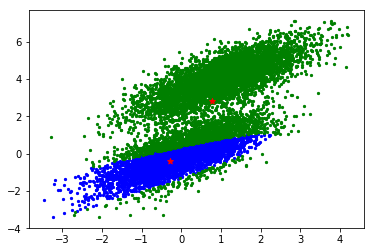

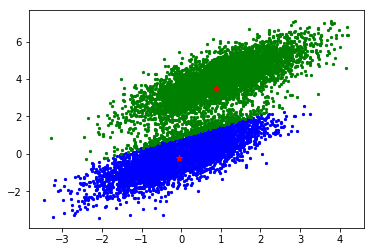

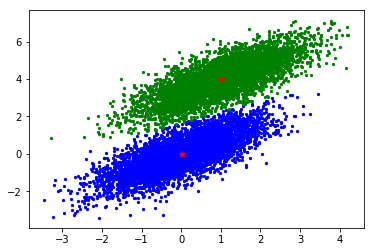

In [9]:
# (e) Training

for i in range(0, 20):
    
    if i % 5 == 0:
        if i == 0:
            plt.figure()
            plt.scatter(x[:, 0], x[:, 1], c = 'green', s = 5)
            plt.scatter([3, 3], [-2, 0], marker = '*', color='r')
            plt.show()
        
        
        else:
            class_0 = x[np.where(label == 0), :]
            class_1 = x[np.where(label == 1), :]
            
            class_0 = np.reshape(class_0, (np.shape(class_0)[1], 2))
            class_1 = np.reshape(class_1, (np.shape(class_1)[1], 2))
            
            mean_point1 = [mean_1[0], mean_2[0]]
            mean_point2 = [mean_1[1], mean_2[1]]
            
            plt.figure()
            plt.scatter(class_0[:, 0], class_0[:, 1], c = 'blue', s = 5)
            plt.scatter(class_1[:, 0], class_1[:, 1], c = 'green', s = 5)
            plt.scatter(mean_point1, mean_point2, marker = '*', c = 'r')
            plt.show()


    pC1, mean_1, covMat_1 = update(pPost_1, x)
    pC2, mean_2, covMat_2 = update(pPost_2, x)
    
    pLike1 = pOfData(x, mean_1, covMat_1)
    pLike2 = pOfData(x, mean_2, covMat_2)
    
    pPost_1, pPost_2 = pPost(pLike1, pLike2, pC1, pC2)
    label = np.where(pPost_1 > pPost_2, 0, 1)



# (f)


Difference between GMM and KMeans:

- Kmeans assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)
- It follows Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid. Hard Assignment might lead to mis-grouping.

- Gaussian Mixture Model (GMM) uses probability of a sample to determine the feasibility of it belonging to a cluster.
- It does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.
- It does not bias the cluster sizes to have specific structures as does by KMeans (Circular).

GMM is a lot more flexible in terms of cluster covariance. k-means is a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. Because of its covariance structure GMM allows for mixed membership of points to clusters, where as in kmeans, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. 
Gaussian mixture models are used a lot when the underlying populations can be explained by a normal distribution and there are many heterogeneous populations.
